In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
# Imports and initialization
%pylab inline

import sys
import os
par_dir = os.path.split(os.getcwd())[0]
if par_dir not in sys.path:
    sys.path.append(par_dir)
import inspect
import pickle
import imp
import re
import json
from scipy.optimize import curve_fit
import pandas as pd

# from IPython.html import widgets
# from IPython.display import display
# from IPython.html.widgets import interact, interactive, fixed


import thulium_python_lib.usefull_functions as usfuncs
import thulium_python_lib.image_processing_new as impr

import ipyparallel as ipp
ipp.CompositeError.tb_limit = 1

rc1 = ipp.Client()
lview = rc1.load_balanced_view()
dview = rc1.direct_view()
dview['par_dir'] = par_dir
# with dview.sync_imports():
#     import sys, os    
%px import sys, os
%px if par_dir not in sys.path: sys.path.append(par_dir)
%px import thulium_python_lib.image_processing_new as impr
%px import imp
%px from ipyparallel import bind_kernel; bind_kernel()

import datetime
import pymongo
from pymongo import MongoClient
from bson.objectid import ObjectId

# start mongoDB client (mongod server should be launched)
# client = MongoClient('mongodb://localhost:27017/')
client = MongoClient('mongodb://192.168.1.15:27017/')
meas_database = client.measData.meas_data

Populating the interactive namespace from numpy and matplotlib
Done importing, module image_processing now
[stdout:0] Done importing, module image_processing now
[stdout:1] Done importing, module image_processing now
[stdout:2] Done importing, module image_processing now
[stdout:3] Done importing, module image_processing now
[stdout:4] Done importing, module image_processing now
[stdout:5] Done importing, module image_processing now
[stdout:6] Done importing, module image_processing now
[stdout:7] Done importing, module image_processing now


In [101]:
# smth like 'D:\!Data\2015_08_20' for lab and like '/Users/artemgolovizin/Downloads/2015_08_20' for mac
os.chdir(r'D:\!Data\2016_02_29')
# os.chdir(r'/Users/artemgolovizin/Downloads/2015_08_20/')
# print('Current directory', os.getcwd());
current_directory = os.path.split(os.getcwd())[-1]
# Create folder 'Figures' for saving individual plot
if not os.path.exists('Figures'):
    os.makedirs('Figures')
    print('Folder Figures has been created')
working_directory = ''
folder = ''

In [102]:
# specify working folder
folder = 'Pictures of lattice vs time'
working_directory = os.path.join(os.getcwd(),folder)
# print('Working directory', working_directory)

dirs = [x for x in os.listdir() if re.match('\d',x)]
meas_type, conf_params, x_lbl, y_lbl, xaxis_calib = impr.get_x_calibration(folder, dirs)

In [103]:
# create loader
loader  = impr.Load_Image(dview)
# downloading images
all_data = loader(working_directory,lview)

# rearranging to dictionary
dataD = impr.rearrange_data(all_data)

   8/8 tasks finished after    0 s
done

Total number of images:  8
Rearranging to dictionary is complited


In [104]:
# create averager
averager = impr.Avr_Image(dview,do_sifting=True,conf_int=0.1)
# averaging data and fitting
avr_dataD = averager(dataD,lview)

# construct new data dictionary without image and calibration atoms number, size and x-axis
navrD = impr.mod_avrData(avr_dataD, xaxis_calib, impr.N_atoms(width=0.5, delta = 5), impr.real_size)

avr_table = impr.get_pandas_table2(navrD)
# for plotting sifted image

#imshow(imread('1 от частоты амплитудной модуляции аома верди (5) 3.9W/26ms/2_1.png'))
#colorbar()

   4/4 tasks finished after    0 s
done
0 images are sifted in folder=0.000000,shot_typeN=1
0 images are sifted in folder=10.000000,shot_typeN=1
0 images are sifted in folder=20.000000,shot_typeN=1
0 images are sifted in folder=15.000000,shot_typeN=1



0.0
10.0
15.0
20.0


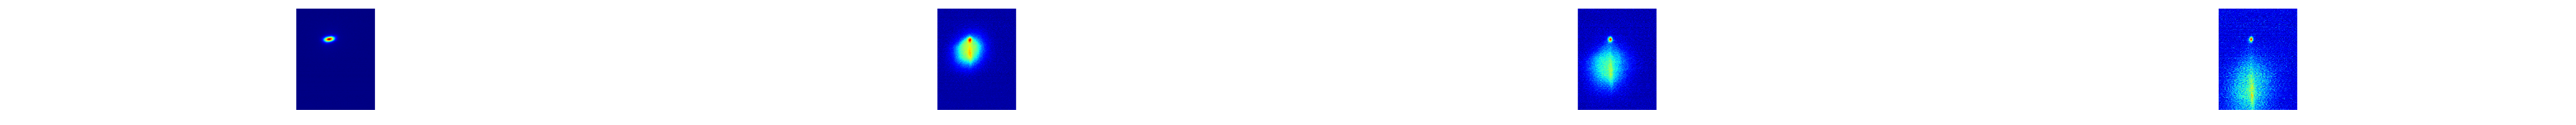

In [120]:
#imshow(avr_dataD[9][1.0].image,cmap=get_cmap('Greens'),vmin=0,vmax=0.01)
fig,ax = subplots(1,len(avr_dataD),figsize=(50,2.5),sharey=True,sharex=True)
tbls = []
for i,key in enumerate(sorted(avr_dataD)):
    print(key)
    ax[i].imshow(avr_dataD[key][1.0].image)
    ax[i].axis('off')
    tbls.append(avr_dataD[key][1.0].image)
#imshow(avr_dataD[364.49][1.0].image[:150,:200],cmap=get_cmap('Greens'),vmin=0,vmax=0.056)
#colorbar()
#print('Center vertical position', avr_table.T[0].center_pos.x, 'um')
#print('Center horizontal position', avr_table.T[0].center_pos.y, 'um')
#avr_table.T

tight_layout()

In [73]:
pd

<module 'pandas' from 'C:\\Program Files\\Anaconda\\lib\\site-packages\\pandas\\__init__.py'>

In [88]:
tbls=None

In [106]:
a = pd.DataFrame(tbls[0])

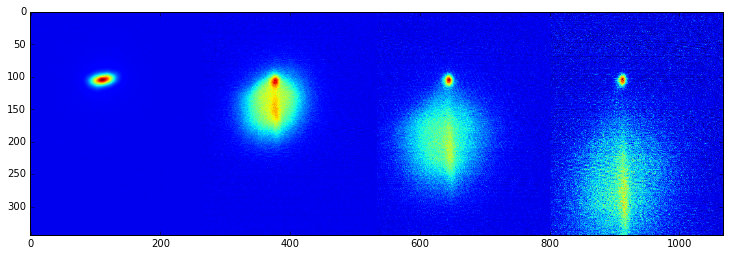

In [115]:
b = pd.concat([pd.DataFrame(avr_dataD[x][1].image/avr_dataD[x][1].image.max()) for x in sorted(avr_dataD)],axis=1)
imshow(b)

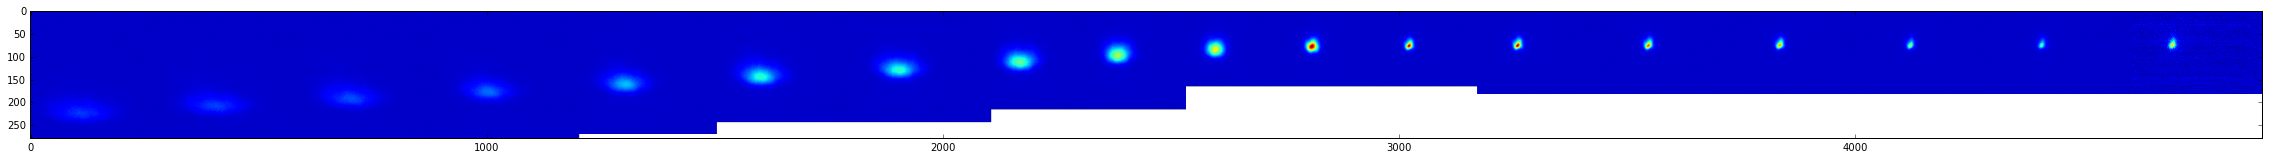

In [114]:
avr_dataD[0][1].image.max()

0.33037668

In [117]:
b.savefig('optical lattice.ipg')

AttributeError: 'DataFrame' object has no attribute 'savefig'

In [121]:
alert('Hi')

NameError: name 'alert' is not defined

In [124]:
import tkinter
import tkMessageBox

top = Tkinter.Tk()
def hello():
   tkMessageBox.showinfo("Say Hello", "Hello World")

B1 = tkinter.Button(top, text = "Say Hello", command = hello)
B1.pack()

top.mainloop()

ImportError: No module named 'tkMessageBox'

In [125]:
tkinter.messagebox.showinfo("info", "message")

AttributeError: module 'tkinter' has no attribute 'messagebox'

In [126]:
dir(tkinter)

['ACTIVE',
 'ALL',
 'ANCHOR',
 'ARC',
 'BASELINE',
 'BEVEL',
 'BOTH',
 'BOTTOM',
 'BROWSE',
 'BUTT',
 'BaseWidget',
 'BitmapImage',
 'BooleanVar',
 'Button',
 'CASCADE',
 'CENTER',
 'CHAR',
 'CHECKBUTTON',
 'CHORD',
 'COMMAND',
 'CURRENT',
 'CallWrapper',
 'Canvas',
 'Checkbutton',
 'DISABLED',
 'DOTBOX',
 'DoubleVar',
 'E',
 'END',
 'EW',
 'EXCEPTION',
 'EXTENDED',
 'Entry',
 'Event',
 'FALSE',
 'FIRST',
 'FLAT',
 'Frame',
 'GROOVE',
 'Grid',
 'HIDDEN',
 'HORIZONTAL',
 'INSERT',
 'INSIDE',
 'Image',
 'IntVar',
 'LAST',
 'LEFT',
 'Label',
 'LabelFrame',
 'Listbox',
 'MITER',
 'MOVETO',
 'MULTIPLE',
 'Menu',
 'Menubutton',
 'Message',
 'Misc',
 'N',
 'NE',
 'NO',
 'NONE',
 'NORMAL',
 'NS',
 'NSEW',
 'NUMERIC',
 'NW',
 'NoDefaultRoot',
 'OFF',
 'ON',
 'OUTSIDE',
 'OptionMenu',
 'PAGES',
 'PIESLICE',
 'PROJECTING',
 'Pack',
 'PanedWindow',
 'PhotoImage',
 'Place',
 'RADIOBUTTON',
 'RAISED',
 'READABLE',
 'RIDGE',
 'RIGHT',
 'ROUND',
 'Radiobutton',
 'S',
 'SCROLL',
 'SE',
 'SEL',
 'SEL_FI

In [127]:
from tkinter import messagebox

In [128]:
messagebox.showinfo("info", "message")

'ok'

In [1]:
import tkinter.messagebox

In [4]:
a = tkinter.messagebox.showinfo("showinfo", "This is an info msg")

In [5]:
a

'ok'

In [7]:
from tkinter import *

from tkinter import messagebox

root = Tk()

root.title("test")
root.geometry("300x300")

app = Frame(root)
messagebox.showinfo("test" , "hoi, dit is een test als je dit leest is het gelukt")
# app.grid()
# button1 = Button(app, text = " exit " , width=2, command=exit)
# button1.grid(padx=110, pady=80)

# def dialog():
#     var = messagebox.showinfo("test" , "hoi, dit is een test als je dit leest is het gelukt")
# button2 = Button(app, text = " uitleg " , width=4, command=dialog)
# button2.grid()


# root.mainloop(3)

'ok'

In [6]:
help(messagebox.showinfo)

Help on function showinfo in module tkinter.messagebox:

showinfo(title=None, message=None, **options)
    Show an info message



In [ ]:
root.